
[🔍 Classification Report for Short Flights (< 900 miles)]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7356
           1       0.95      0.91      0.93      3622

    accuracy                           0.95     10978
   macro avg       0.95      0.94      0.95     10978
weighted avg       0.95      0.95      0.95     10978



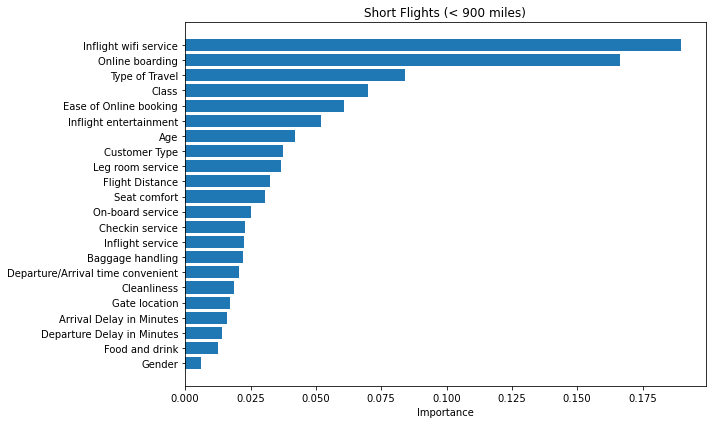


[🔍 Classification Report for Long Flights (≥ 900 miles)]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4428
           1       0.98      0.95      0.97      5313

    accuracy                           0.96      9741
   macro avg       0.96      0.96      0.96      9741
weighted avg       0.96      0.96      0.96      9741



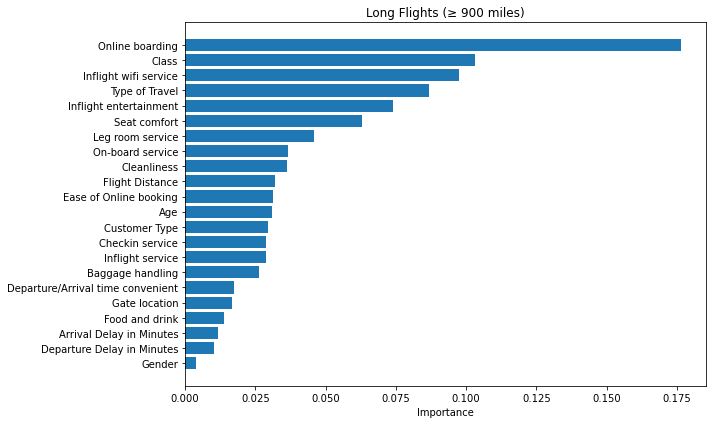


📊 Short Flight 중요 변수 Top 10
Inflight wifi service     0.189630
Online boarding           0.166185
Type of Travel            0.084288
Class                     0.070101
Ease of Online booking    0.060580
Inflight entertainment    0.051982
Age                       0.042132
Customer Type             0.037246
Leg room service          0.036616
Flight Distance           0.032279
dtype: float64

📊 Long Flight 중요 변수 Top 10
Online boarding           0.176446
Class                     0.103015
Inflight wifi service     0.097527
Type of Travel            0.086827
Inflight entertainment    0.074152
Seat comfort              0.062895
Leg room service          0.045711
On-board service          0.036440
Cleanliness               0.036208
Flight Distance           0.032015
dtype: float64


In [8]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 2. CSV 파일 불러오기
df = pd.read_csv('downloads/plane.csv')  # 또는 직접 경로 지정: 'C:/Users/너/Downloads/plane.csv'

# 3. 불필요한 열 제거
df_clean = df.drop(columns=['Unnamed: 0', 'id'])

# 4. 결측치 제거 (Arrival Delay in Minutes)
df_clean = df_clean.dropna()

# 5. 타겟 변수 인코딩
df_clean['satisfaction'] = df_clean['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# 6. 범주형 변수 라벨 인코딩
categorical_cols = df_clean.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# 7. Flight Distance 기준으로 분할
short_flight_df = df_clean[df_clean['Flight Distance'] < 900]
long_flight_df = df_clean[df_clean['Flight Distance'] >= 900]

# 8. 훈련 및 feature importance 시각화 함수
def train_and_plot_feature_importance(data, title):
    X = data.drop(columns=['satisfaction'])
    y = data['satisfaction']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    importances = model.feature_importances_
    features = X.columns
    sorted_idx = np.argsort(importances)[::-1]
  
    # 성능 출력
    y_pred = model.predict(X_test)
    print(f'\n[🔍 Classification Report for {title}]')
    print(classification_report(y_test, y_pred))
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), features[sorted_idx])
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return pd.Series(importances, index=features).sort_values(ascending=False)

# 9. 실행
short_importance = train_and_plot_feature_importance(short_flight_df, 'Short Flights (< 900 miles)')
long_importance = train_and_plot_feature_importance(long_flight_df, 'Long Flights (≥ 900 miles)')

# 10. 상위 변수 출력
print("\n📊 Short Flight 중요 변수 Top 10")
print(short_importance.head(10))

print("\n📊 Long Flight 중요 변수 Top 10")
print(long_importance.head(10))


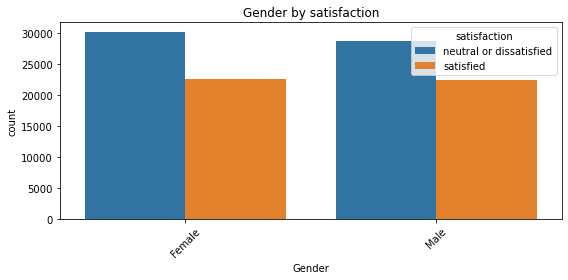

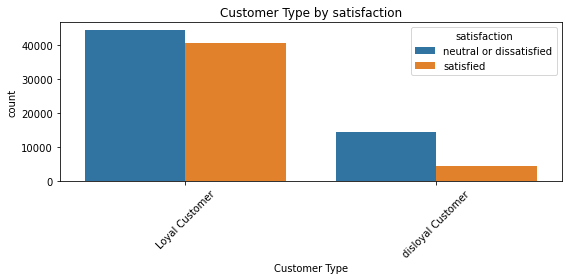

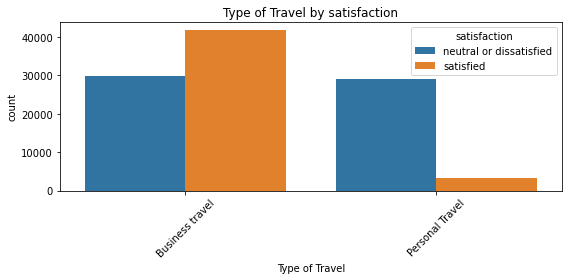

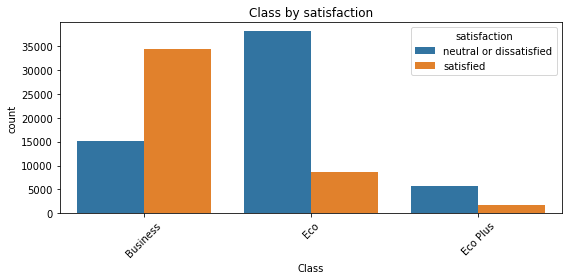

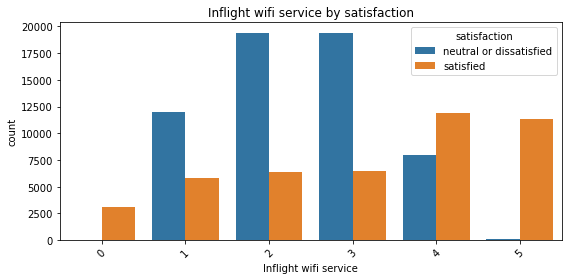

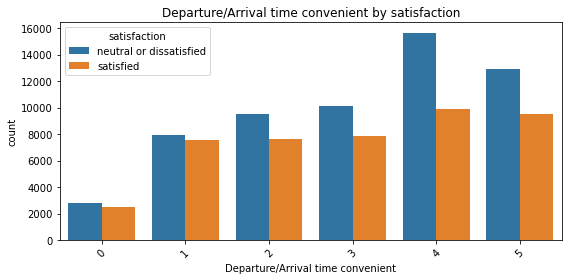

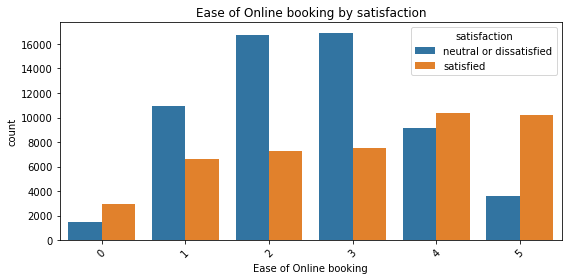

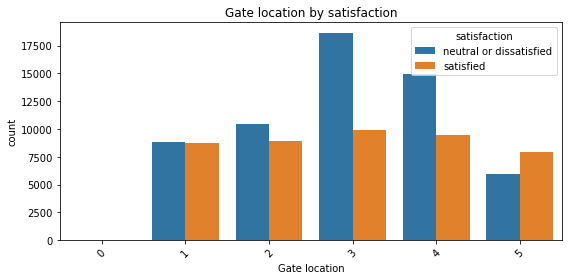

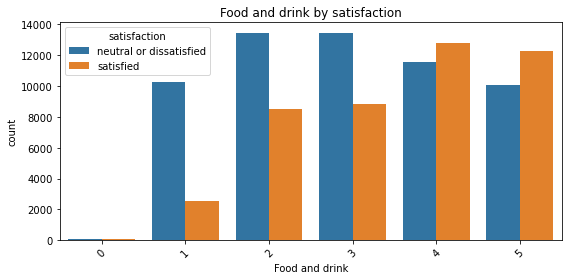

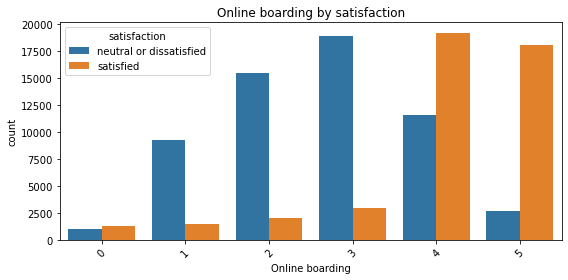

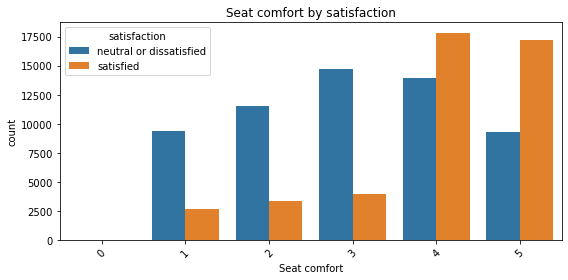

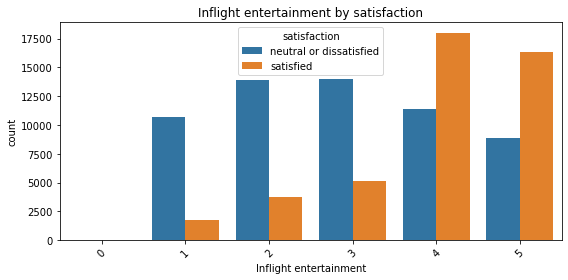

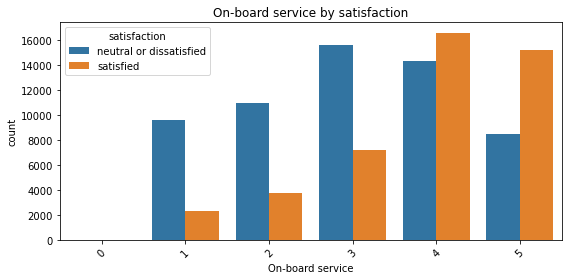

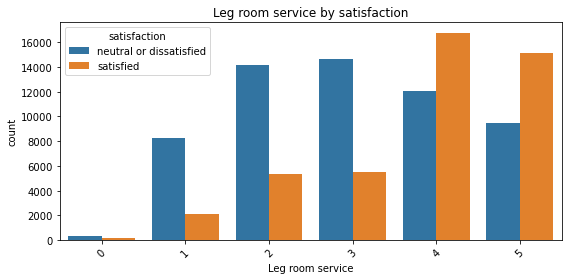

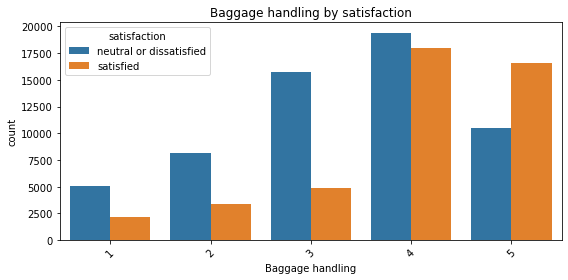

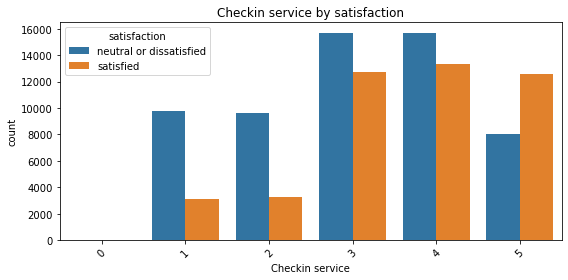

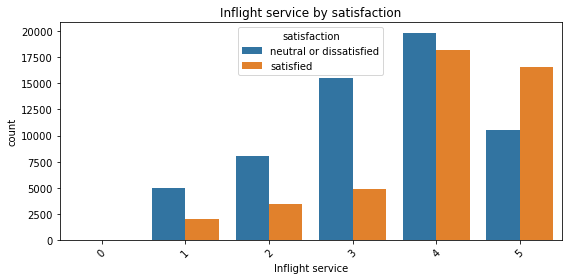

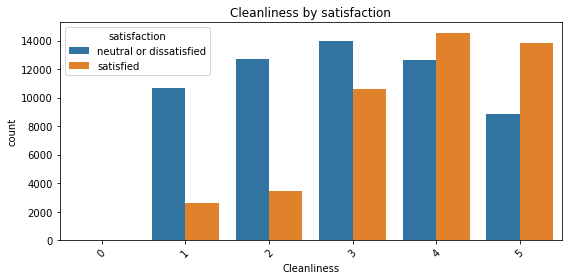

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('downloads/plane.csv')

# 만족도 기준 변수
group_var = 'satisfaction'

# 제외할 열들
exclude_cols = ['Unnamed: 0', 'id', 'Age', 'Flight Distance',
                'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# 0~5 범위의 Likert 척도 변수들
extended_likert_cols = [col for col in df.columns 
                        if df[col].dtype in ['int64', 'float64']
                        and df[col].nunique() <= 6
                        and col not in exclude_cols]

# 범주형 변수들
categorical_cols = [col for col in df.columns 
                    if df[col].dtype == 'object' and col not in exclude_cols + [group_var]]

# 시각화 대상 변수들
plot_cols_extended = categorical_cols + extended_likert_cols

# 시각화
for col in plot_cols_extended:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=group_var, order=sorted(df[col].dropna().unique()))
    plt.title(f'{col} by {group_var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


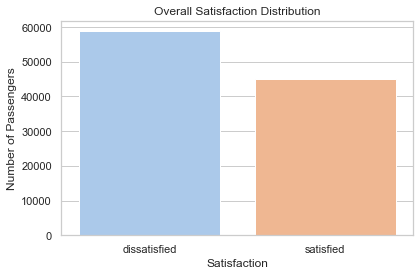

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 불러오기
df = pd.read_csv('downloads/plane.csv')

# satisfaction 값을 satisfied vs dissatisfied로 이진화
df['satisfaction_binary'] = df['satisfaction'].apply(
    lambda x: 'satisfied' if x == 'satisfied' else 'dissatisfied'
)

# bar chart 그리기
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='satisfaction_binary', palette='pastel')
plt.title('Overall Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()
